# Lecture 2
---
This is an example Jupyter notebook for some of the topics covered in lecture 2, part of the _"Data science tools and Machine Learning"_ track. See also the `data-science-tools.ipynb` notebook for a good overview of the available methods in `numpy`, `pandas`, and `matplotlib`.

## 1. Data handling
---

In [5]:
# Custom import(s)
from daml import plot, utilities

# Make notebook as reproducible as possible
utilities.make_reproducible(seed=1234)

c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\calum\appd

Making reproducible with seed 1234. Please not that running in parallel (e.g. by setting `n_jobs > 1` in certain scikit-learn functions) breaks reproducibility.


In [6]:
# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [7]:
# Load iris dataset 
iris = datasets.load_iris()

In [8]:
# Show available properties
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
# Show dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
# Show size of dataset
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [11]:
# Show feature and target names
print("Feature names: {}".format(iris.feature_names))
print("Target names:  {}".format(iris.target_names))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


In [12]:
# Create pandas.DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Add new column(s) for target (type)
df['type']   = iris.target_names[iris.target]
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [14]:
# In cases with incomplete and/or corrupted data, it may be necessary to do some
# cleaning.
# -- Remove duplicates *if* you have reason to suspect that repeated, identical 
#    entries are pathological (they might not be)
#df = df.drop_duplicates()

# -- Remove rows with 'not-a-number' in the features
nan = np.any(np.isnan(df[iris.feature_names]), axis=1)
df  = df[~nan]

print ("Shape after cleaning: {}".format(df.shape))
df.head()

Shape after cleaning: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [15]:
# Save to, and reload from, CSV file
df.to_csv("iris.csv")

# ...

df2 = pd.read_csv("iris.csv", index_col=0)
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [16]:
# Get summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
# Access column two ways
df.type
df['type']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: type, Length: 150, dtype: object

In [18]:
# List subset of columns
df[['sepal width (cm)', 'petal width (cm)', 'type']].head(10)

,sepal width (cm),petal width (cm),type
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa
3,3.1,0.2,setosa
4,3.6,0.2,setosa
5,3.9,0.4,setosa
6,3.4,0.3,setosa
7,3.4,0.2,setosa
8,2.9,0.2,setosa
9,3.1,0.1,setosa


In [19]:
# List subset of rows by row number
df[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
10,5.4,3.7,1.5,0.2,setosa,0
11,4.8,3.4,1.6,0.2,setosa,0
12,4.8,3.0,1.4,0.1,setosa,0
13,4.3,3.0,1.1,0.1,setosa,0
14,5.8,4.0,1.2,0.2,setosa,0


In [20]:
# ... or, equivalently
df.iloc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
10,5.4,3.7,1.5,0.2,setosa,0
11,4.8,3.4,1.6,0.2,setosa,0
12,4.8,3.0,1.4,0.1,setosa,0
13,4.3,3.0,1.1,0.1,setosa,0
14,5.8,4.0,1.2,0.2,setosa,0


In [21]:
# Sometimes, row number and index differ (e.g. when shuffling)
df = df.sample(frac=1, replace=False, random_state=1234)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
91,6.1,3.0,4.6,1.4,versicolor,1
63,6.1,2.9,4.7,1.4,versicolor,1
103,6.3,2.9,5.6,1.8,virginica,2
6,4.6,3.4,1.4,0.3,setosa,0
59,5.2,2.7,3.9,1.4,versicolor,1


In [22]:
# This illustrates the difference in accessing row by row number 
df.iloc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
82,5.8,2.7,3.9,1.2,versicolor,1
42,4.4,3.2,1.3,0.2,setosa,0
117,7.7,3.8,6.7,2.2,virginica,2
61,5.9,3.0,4.2,1.5,versicolor,1
43,5.0,3.5,1.6,0.6,setosa,0


In [23]:
# ... or by *index*
df.loc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
10,5.4,3.7,1.5,0.2,setosa,0
131,7.9,3.8,6.4,2.0,virginica,2
15,5.7,4.4,1.5,0.4,setosa,0


In [24]:
# Count number of rows in each class
df.groupby('type').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
type,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


In [25]:
# Get mean sepal length for each group, and sort by descending value
df.groupby('type')['sepal length (cm)'].mean().sort_values(ascending=False)

type
virginica     6.588
versicolor    5.936
setosa        5.006
Name: sepal length (cm), dtype: float64

In [26]:
# Select only events with sepal length greater than 6.0
mask = df['sepal length (cm)'] > 6.0
df[mask].groupby('type').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
type,,,,,
versicolor,20,20,20,20,20
virginica,41,41,41,41,41


In [27]:
# Convert pandas.DataFrame to numpy.array
array = df.values
array

array([[6.1, 3.0, 4.6, 1.4, 'versicolor', 1],
       [6.1, 2.9, 4.7, 1.4, 'versicolor', 1],
       [6.3, 2.9, 5.6, 1.8, 'virginica', 2],
       [4.6, 3.4, 1.4, 0.3, 'setosa', 0],
       [5.2, 2.7, 3.9, 1.4, 'versicolor', 1],
       [4.7, 3.2, 1.6, 0.2, 'setosa', 0],
       [5.2, 3.5, 1.5, 0.2, 'setosa', 0],
       [5.0, 3.2, 1.2, 0.2, 'setosa', 0],
       [5.7, 2.8, 4.1, 1.3, 'versicolor', 1],
       [7.7, 2.8, 6.7, 2.0, 'virginica', 2],
       [5.8, 2.7, 3.9, 1.2, 'versicolor', 1],
       [4.4, 3.2, 1.3, 0.2, 'setosa', 0],
       [7.7, 3.8, 6.7, 2.2, 'virginica', 2],
       [5.9, 3.0, 4.2, 1.5, 'versicolor', 1],
       [5.0, 3.5, 1.6, 0.6, 'setosa', 0],
       [5.7, 2.6, 3.5, 1.0, 'versicolor', 1],
       [6.3, 3.3, 6.0, 2.5, 'virginica', 2],
       [5.0, 3.0, 1.6, 0.2, 'setosa', 0],
       [6.7, 2.5, 5.8, 1.8, 'virginica', 2],
       [5.6, 2.7, 4.2, 1.3, 'versicolor', 1],
       [6.4, 2.9, 4.3, 1.3, 'versicolor', 1],
       [6.5, 2.8, 4.6, 1.5, 'versicolor', 1],
       [6.4, 3.2, 4.5

In [28]:
# Convert numpy.array to python list
array.tolist()

[[6.1, 3.0, 4.6, 1.4, 'versicolor', 1],
 [6.1, 2.9, 4.7, 1.4, 'versicolor', 1],
 [6.3, 2.9, 5.6, 1.8, 'virginica', 2],
 [4.6, 3.4, 1.4, 0.3, 'setosa', 0],
 [5.2, 2.7, 3.9, 1.4, 'versicolor', 1],
 [4.7, 3.2, 1.6, 0.2, 'setosa', 0],
 [5.2, 3.5, 1.5, 0.2, 'setosa', 0],
 [5.0, 3.2, 1.2, 0.2, 'setosa', 0],
 [5.7, 2.8, 4.1, 1.3, 'versicolor', 1],
 [7.7, 2.8, 6.7, 2.0, 'virginica', 2],
 [5.8, 2.7, 3.9, 1.2, 'versicolor', 1],
 [4.4, 3.2, 1.3, 0.2, 'setosa', 0],
 [7.7, 3.8, 6.7, 2.2, 'virginica', 2],
 [5.9, 3.0, 4.2, 1.5, 'versicolor', 1],
 [5.0, 3.5, 1.6, 0.6, 'setosa', 0],
 [5.7, 2.6, 3.5, 1.0, 'versicolor', 1],
 [6.3, 3.3, 6.0, 2.5, 'virginica', 2],
 [5.0, 3.0, 1.6, 0.2, 'setosa', 0],
 [6.7, 2.5, 5.8, 1.8, 'virginica', 2],
 [5.6, 2.7, 4.2, 1.3, 'versicolor', 1],
 [6.4, 2.9, 4.3, 1.3, 'versicolor', 1],
 [6.5, 2.8, 4.6, 1.5, 'versicolor', 1],
 [6.4, 3.2, 4.5, 1.5, 'versicolor', 1],
 [6.1, 2.8, 4.7, 1.2, 'versicolor', 1],
 [7.2, 3.6, 6.1, 2.5, 'virginica', 2],
 [5.3, 3.7, 1.5, 0.2, 'setosa', 0]

## 2.  Visualisation
---

c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


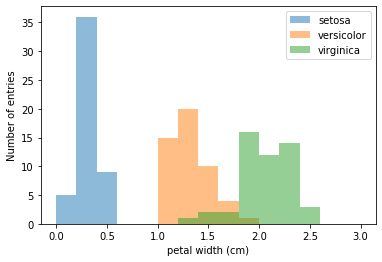

In [29]:
# Feature to plot
feat = 'petal width (cm)'

# Bin range
bins = np.linspace(0, 3, 15 + 1, endpoint=True)

# Create figure and axis objects.
fig, ax = plt.subplots()

for t in iris.target_names:
    # Boolean mask
    mask = df['type'] == t
    
    # Make histogram for current type
    ax.hist(df[mask][feat], bins=bins, alpha=0.5, label=t)
    pass

# Decorations
ax.legend()
ax.set_xlabel(feat)
ax.set_ylabel("Number of entries")
fig.show()

c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


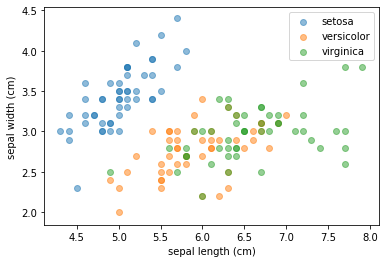

In [30]:
# Features to plot
featx = 'sepal length (cm)'
featy = 'sepal width (cm)'

# Create figure and axis objects.
fig, ax = plt.subplots()

for t in iris.target_names:
    # Boolean mask
    mask = df['type'] == t

    # Scatter plot for current type
    ax.scatter(df[mask][featx], df[mask][featy], label=t, alpha=0.5)
    pass

# Draw legend
ax.legend()
ax.set_xlabel(featx)
ax.set_ylabel(featy)
fig.show()

The cells above shows you how to create some simple plots using `matplotlib`. However, to speed things up a bit, so we have more time for the cool stuff, the `plot.py` file contains some plotting macros that may come in handy and save you from reinventing the wheel. Please have a look through the file, and try to get a feeling for which methods it provides, and how they work. Here are a few examples:

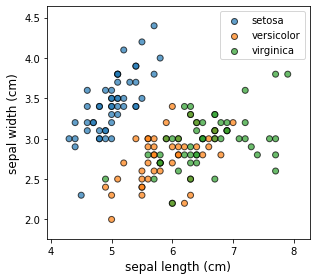

In [31]:
plot.scatter(df[[featx, featy]], df.type);

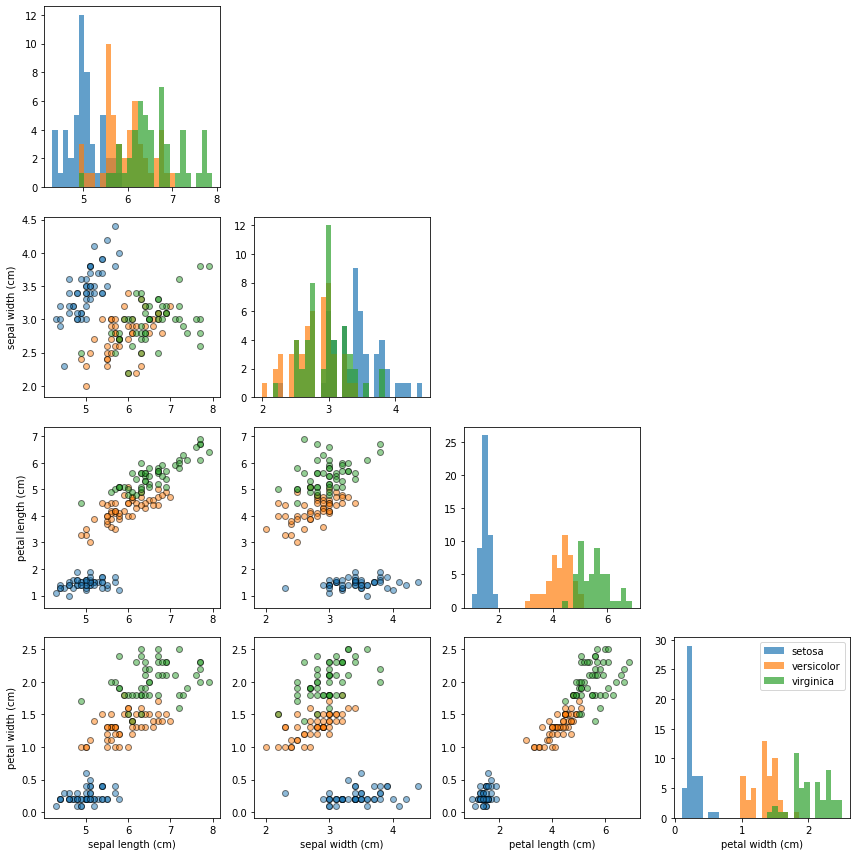

In [32]:
fig = plot.pair_grid(df, target='type', features=iris.feature_names)

## 4. Decision Trees
---

In [33]:
# Import relevant classifiers(s)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [34]:
# Define common hyper-parameters for DTs and ensembles
max_depth    =  3
n_estimators = 20

In [35]:
# Prepare pandas.DataFrames to be fitted.
X, y, l = df[['sepal length (cm)', 'sepal width (cm)']], df.target, df.type

In [47]:
# Fit a simple decision tree classifier
dt = DecisionTreeClassifier(max_depth=max_depth)
print(y.values)
describe(dt)
dt.fit(X.values, y.values)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0 1 2 0 2 1 0 0
 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0 2 1 2 2 1 0 2
 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2 1 2 2 1 0 1 2
 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2 0 2 0 0 2 2 1
 0 0]


NameError: name 'describe' is not defined

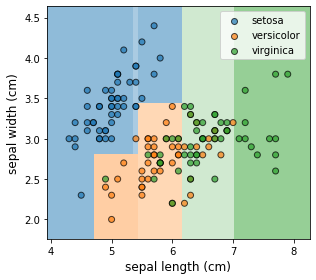

In [33]:
# Plot the data and the fitted decision contour
plot.scatter(X, l, clf=dt);

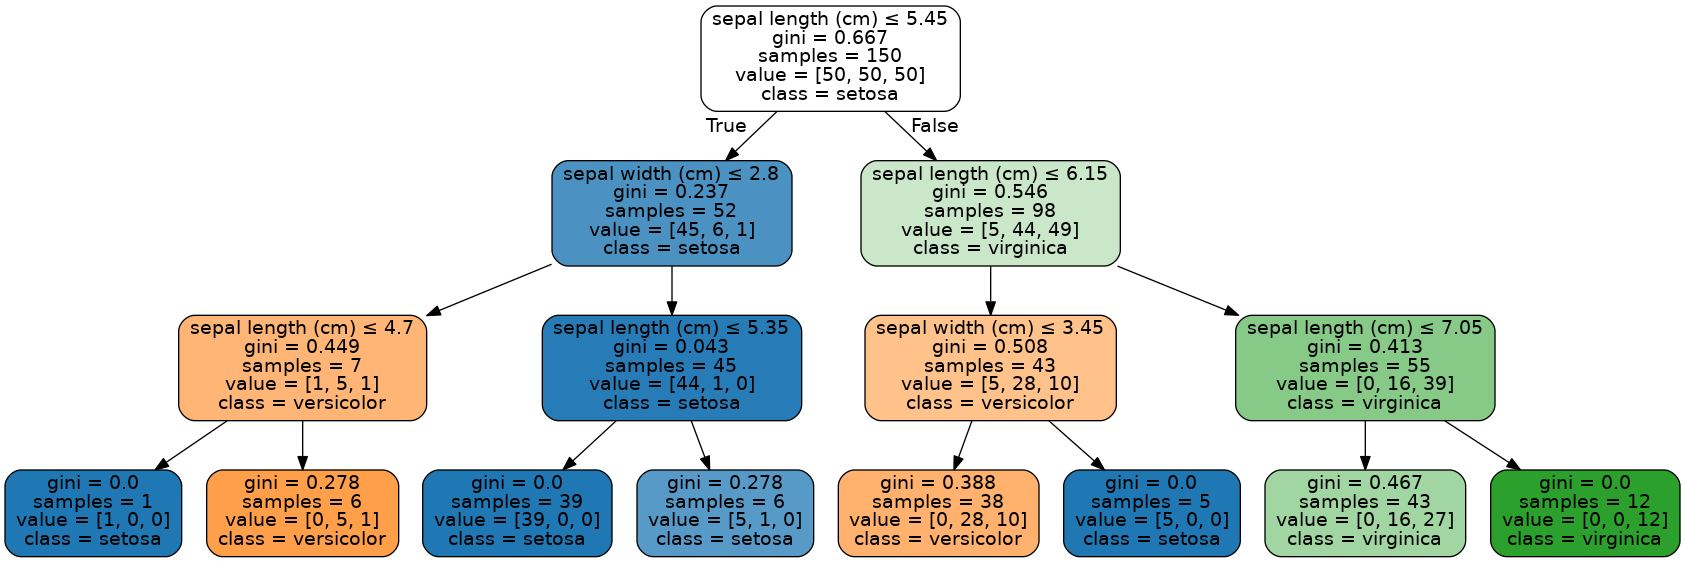

In [34]:
from IPython.display import Image
graph = plot.tree(dt, X.columns, iris.target_names)
Image(graph.create_png())

## 5. Ensemble methods
---

In [35]:
# Fit an AdaBoost BDT classifier
bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=max_depth),
                         n_estimators=n_estimators)
bdt.fit(X.values, y.values)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

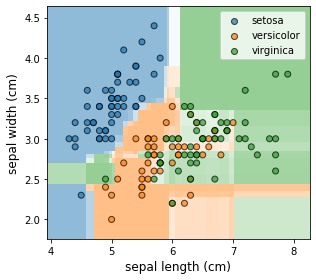

In [36]:
# Plot the data and the fitted decision contour
plot.scatter(X, l, clf=bdt);

In [37]:
# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
rf.fit(X.values, y.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

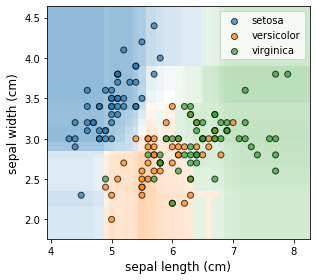

In [38]:
# Plot the data and the fitted decision contour
plot.scatter(X, l, clf=rf);

### Decision contours in high dimensions: Refitting vs. interpolating

This may be a bit of a technical point, but if you've made it this far, it might be worth discussing:

When training an ML classifier on more than two features, it is not always easy to display the result. Therefore, to illustrate the differences between different ML models, we can choose to re-fit a particular classifier (with certain hyper-parameters) to all possible pairs of features, using only two features at a time. This means that, for a given pair of features, we can unambiguously display the decision boundary in those two dimensions. That is similar to what we did above, using only the two `sepal length (cm)` and `sepal width (cm)` features.

We can do this exercise for all pairs of features in the iris dataset, using the `plot.pair_grid` method:

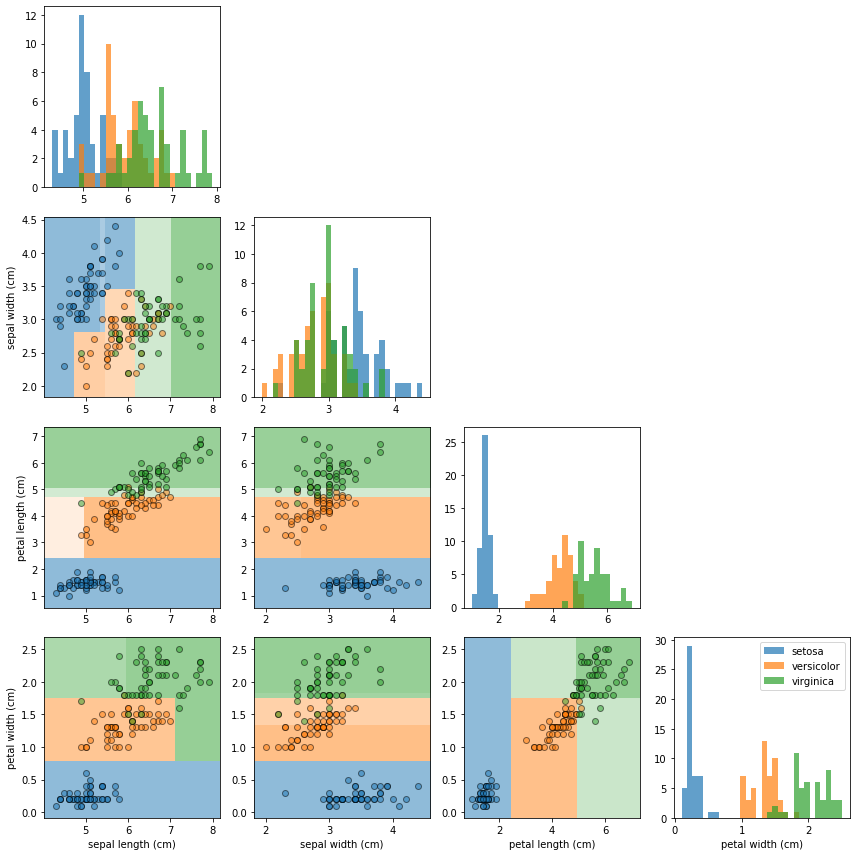

In [39]:
fig = plot.pair_grid(df, 'type', features=iris.feature_names, clf=DecisionTreeClassifier(max_depth=max_depth), refit=True);

Each off-diagonal square in the grid above shows the decision contour for a distinct classifier DT, trained on just the two features spanning the $x$- and $y$-axis. We can do the same thing for the AdaBoost and random forest classifiers. 

However, when evaluating a particular ML classifier, trained on $N > 2$ features, displaying these decision contours can be more difficult. This is because, for each parameter configuration in one of the off-diagonal scatter plots above, only the values of $2$ features (the ones on the $x$- and $y$-axes) are unambiguously fixed, while the values of the remaining $N - 2 > 0$ features are indeterminate. To solve this problem, for each point in the scatter plots above, we can approximate the values of the remaining $N - 2$ features, and use this as a stand-in. This is done "under the hood" in the `plot` module and is enabled in `plot.pair_grid` by default, _i.e._ when not explicitly setting `refit=True`. The result is shown below.

In [40]:
# Prepare pandas.DataFrames to be fitted.
X, y, l = df[iris.feature_names], df.target, df.type

# Fit a simple decision tree classifier
dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(X.values, y.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

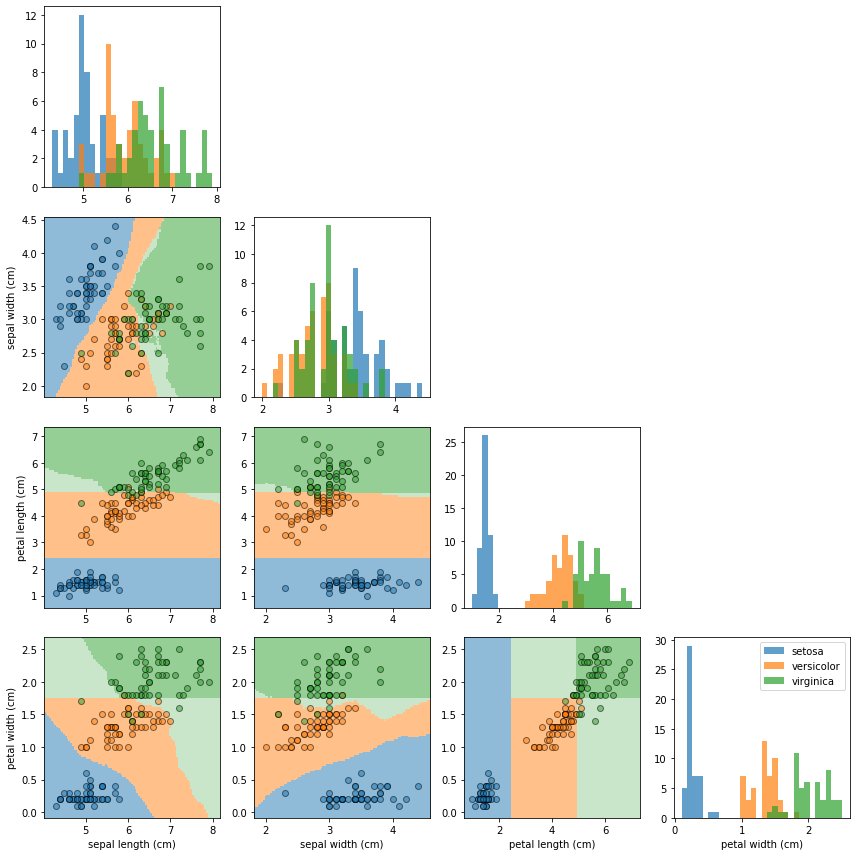

In [41]:
fig = plot.pair_grid(df, 'type', features=X.columns, clf=dt);

The above plots still illustrates a single decision tree classifier, but one trained on all four iris features. In this way, the dimensions along which a DT selection is performed (_e.g._ `petal length (cm)` and `petal width (cm)`) still exhibit unambiguoisly rectangular decision bondaries. However, in the remaining feature dimensions, we have to perform some sort of interpolation which is still reprentative of the classifier's logic (see _e.g._ `sepal width (cm)` vs. `sepal length (cm)`).